In [2]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Q1 Read in data

In [3]:
# Reading labels.txt 
labels = pd.read_csv('labels.txt',
                    sep = '\t',
                    header = None,
                    names = ['turk','url','category'])
# Reading gold.txt file
gold = pd.read_csv('gold.txt',
                    sep = '\t',
                    header = None,
                    names = ['url','category'])

# Q2 Split into two DataFrames

In [4]:
gold = gold.drop_duplicates()
labels = labels.drop_duplicates(subset = ['turk','url','category'])
labels_on_gold = labels[labels['url'].isin(gold['url'])]
labels_unknown = labels[~labels['url'].isin(gold['url'])]
labels_on_gold

,turk,url,category
245,A1253FXHCZ9CWM,http://0800-horoscope.com,G
246,A153PKAL7OAY36,http://0800-horoscope.com,G
247,A1FV9SAPL5C6KY,http://0800-horoscope.com,G
248,A1JTOT0DWM6QGL,http://0800-horoscope.com,G
249,A1PXXEOGQ76RNJ,http://0800-horoscope.com,G
250,A21US576U8SCO4,http://0800-horoscope.com,G
251,A22C0PJUBFJTI0,http://0800-horoscope.com,G
252,A270HOAHEVIFW0,http://0800-horoscope.com,G
253,A2EG8FHODTEV63,http://0800-horoscope.com,R
254,A2LM400F4F0V0M,http://0800-horoscope.com,G


## Q3 Compute accuracies of turks

In [5]:
merged_labels = pd.merge(labels_on_gold,gold[['url','category']],on='url', how='left',suffixes=['_labels','_gold'])
merged_labels['correct_values'] = (merged_labels['category_labels'] == merged_labels['category_gold'])
merged_labels['correct_values'].replace(False, 0, inplace=True)


rater_goodness = merged_labels.groupby('turk')['correct_values'].agg(['count','mean'])
rater_goodness 

,count,mean
turk,,
A112DVP1KG4QZU,1,1.000000
A1253FXHCZ9CWM,29,0.517241
A12CY1Q7XKJJDE,1,1.000000
A12RE8G66WTO8B,20,0.750000
A12Y1GTGIQDGRA,3,0.333333
A13CEW9JGDWGX1,1,1.000000
A13OE9GBRJ0S2U,4,0.750000
A14IQ4GLNWNPOJ,1,1.000000
A153PKAL7OAY36,148,0.722973


## Q4 Odds Ratio

In [6]:
rater_goodness['odds'] = rater_goodness['mean'] /(1.001 - rater_goodness['mean'])
rater_goodness

,count,mean,odds
turk,,,
A112DVP1KG4QZU,1,1.000000,1000.000000
A1253FXHCZ9CWM,29,0.517241,1.069214
A12CY1Q7XKJJDE,1,1.000000,1000.000000
A12RE8G66WTO8B,20,0.750000,2.988048
A12Y1GTGIQDGRA,3,0.333333,0.499251
A13CEW9JGDWGX1,1,1.000000,1000.000000
A13OE9GBRJ0S2U,4,0.750000,2.988048
A14IQ4GLNWNPOJ,1,1.000000,1000.000000
A153PKAL7OAY36,148,0.722973,2.600369


## Q5 Most accurate tucks

In [7]:
rater_goodness [rater_goodness['count']>=20].sort_values(by='mean',ascending = False)[:10]

rater_goodness.reindex()

,count,mean,odds
turk,,,
A112DVP1KG4QZU,1,1.000000,1000.000000
A1253FXHCZ9CWM,29,0.517241,1.069214
A12CY1Q7XKJJDE,1,1.000000,1000.000000
A12RE8G66WTO8B,20,0.750000,2.988048
A12Y1GTGIQDGRA,3,0.333333,0.499251
A13CEW9JGDWGX1,1,1.000000,1000.000000
A13OE9GBRJ0S2U,4,0.750000,2.988048
A14IQ4GLNWNPOJ,1,1.000000,1000.000000
A153PKAL7OAY36,148,0.722973,2.600369


## Q6 Rating counts versus accuracy

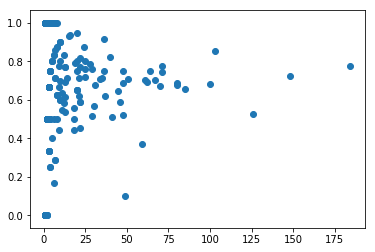

In [8]:
matplotlib.pyplot.scatter(rater_goodness['count'],rater_goodness['mean'])

There does not seems to be a major correlation between the count and average success. It seems that most of the turks who have rated on ~10-20 urls are correct on an average 80% of the times. There seem to be some outliers in terms of the number of urls some of the turks have rated.

In [20]:
rater_goodness['count'].corr(rater_goodness['mean'])

0.04498264044141278

As we can see form the values above the correlation between the count and mean is just 4.5% which is very small.

## Q7 Overall predicted odds

In [27]:
rater_goodness_filter = rater_goodness [rater_goodness['count'] > rater_goodness['count'].quantile(0.75)]
rater_goodness_filter.reset_index('turk',inplace=True)

labels_gold_merge = pd.merge(labels_unknown,rater_goodness_filter[['turk','odds']],on='turk', how='left')

overall_odds = labels_gold_merge.dropna().groupby(['url','category'])['odds'].prod().unstack()
overall_odds.T

url,http://0-101.net,http://000.cc,http://0000.jp,http://000relationships.com,http://000vitamins.com,http://000webhost.com,http://003my.com,http://007absolutehardcore.com/early_cumshots/index.html,http://007swz.cn,http://01768.com,...,http://zucaiba.com,http://zumin-ads.com,http://zune.net,http://zvezdanews.ru,http://zwame.pt,http://zwinky.com,http://zylom.com,http://zynga.com,http://zz868.com,http://zzx.cc
category,,,,,,,,,,,,,,,,,,,,,
G,2.297602,1.485456,14.339248,3.841962,4.033641,11.892639,4.861524,NaN,1.485456,1.485456,...,1.367113,2.750845,20.002004,4.45842,8.535103,17.201875,1.849543,3.666513,1.047852,1.417620
P,NaN,NaN,NaN,1.851852,NaN,NaN,NaN,3.346522,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.851852,NaN
R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.290450,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,293.252871,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.620746


## Q8 Predicted categories

In [30]:
overall_odds_75 = pd.DataFrame({'top odds': overall_odds.T.max().values, 'category': overall_odds.T.idxmax().values},
                 index = overall_odds.T.idxmax().index)

overall_odds_75

,category,top odds
url,,
http://0-101.net,G,2.297602
http://000.cc,G,1.485456
http://0000.jp,G,14.339248
http://000relationships.com,G,3.841962
http://000vitamins.com,G,4.033641
http://000webhost.com,G,11.892639
http://003my.com,G,4.861524
http://007absolutehardcore.com/early_cumshots/index.html,X,293.252871
http://007swz.cn,G,1.485456


## Q9 Predicted categories using more turks

In [23]:
# Repeating the process with >25%
rater_goodness_filter = rater_goodness [rater_goodness['count'] > rater_goodness['count'].quantile(0.25)]
rater_goodness_filter.reset_index('turk',inplace=True)

labels_gold_merge = pd.merge(labels_unknown,rater_goodness_filter[['turk','odds']],on='turk', how='left')
overall_odds = labels_gold_merge.dropna().groupby(['url','category'])['odds'].prod().unstack()

overall_odds_25 = pd.DataFrame({'top odds': overall_odds.T.max().values, 'category': overall_odds.T.idxmax().values},
                 index = overall_odds.T.idxmax().index)

merged_turcks = overall_odds_75.merge(overall_odds_25,
                                left_on='url',
                               right_on='url',
                               suffixes = ['_75','_25'])

# Creating crostab to compare-

comparison_crosstab = pd.crosstab(merged_turcks['category_75'],merged_turcks['category_25'],margins=True)
comparison_crosstab

category_25,G,P,R,X,All
category_75,,,,,
G,8280,586,180,214,9260
P,196,352,52,25,625
R,22,34,127,25,208
X,28,5,28,456,517
All,8526,977,387,720,10610
